# Landsat 4-5 TM Land Surface Temperature and QA Masking

In [1]:
import os 
import yaml
from munch import munchify

# define repo name and get root working directory
repo = 'uhi'
root_path = os.getcwd()[ 0 : os.getcwd().find( repo ) + len ( repo )]

# get path to configuration files
cfg_path = os.path.join( root_path, 'cfg' )
cfg_path = os.path.join( cfg_path, 'landsat/tm' )
cfg_path

'C:\\Users\\crwil\\Documents\\GitHub\\uhi\\cfg\\landsat/tm'

### Retrieve Landsat 4-5 TM Thermal Imagery via Sentinel-Hub Process API

In [2]:
# load cfg file using yaml parser
with open( os.path.join( cfg_path, 'process-lst.yml' ), 'r' ) as f:
    config = munchify( yaml.safe_load( f ) )

In [3]:
# create instance of shclient class
from processapi import Client
client = Client( config, base_url = 'https://services-uswest2.sentinel-hub.com' )

In [4]:
# create aoi bounding box 
coords = -2.9, 51.2, -2.5, 51.5
bbox = client.getBoundingBox( coords )
resolution = 30

In [16]:
# arbitrary timeframe
from datetime import datetime
timeframe = { 'start' : datetime( 1997, 7, 1, 0, 0, 0 ), 
                'end' : datetime( 1997, 7, 30, 23, 59, 59 ) }

In [17]:
# get time series via process api
response = client.getTimeSeries ( bbox, timeframe, resolution=resolution )
response._df

,rgb.tif,lst.tif,data_mask.tif,time
0,"[[[138, 135, 123], [129, 130, 119], [140, 137,...","[[274.17816, 274.32855, 275.0976, 274.84467, 2...","[[[1, 40, 0], [1, 2, 0], [1, 40, 0], [1, 40, 0...",1997-07-03 10:34:49.392000+00:00
1,"[[[253, 251, 230], [255, 255, 248], [255, 255,...","[[284.733, 284.9039, 284.9039, 284.62363, 284....","[[[1, 32, 0], [1, 32, 0], [1, 32, 0], [1, 32, ...",1997-07-10 10:41:14.932000+00:00
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1997-07-12 10:28:57.376000+00:00
3,"[[[65, 59, 40], [63, 56, 39], [65, 56, 37], [6...","[[290.92645, 290.92645, 290.92645, 290.92645, ...","[[[1, 32, 0], [1, 32, 0], [1, 32, 0], [1, 32, ...",1997-07-19 10:35:22.526000+00:00
4,"[[[232, 232, 220], [232, 232, 219], [236, 237,...","[[277.76364, 277.9072, 276.91257, 276.68015, 2...","[[[1, 36, 0], [1, 40, 0], [1, 40, 0], [1, 40, ...",1997-07-26 10:41:47.304000+00:00
5,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1997-07-28 10:29:29.593000+00:00


### Visualise Landsat 4-5 TM RGB Images and QA Data Masks

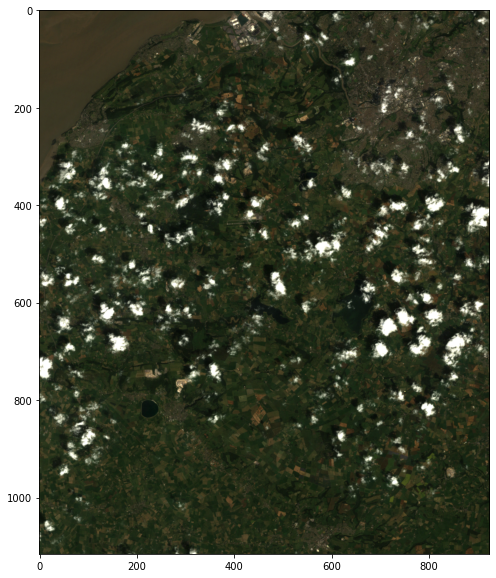

In [19]:
import matplotlib.pyplot as plt

# plot rgb image
ax = plt.figure( figsize=(10,10))
plt.imshow( response._df[ 'rgb.tif' ].iloc[ 3 ] ) 

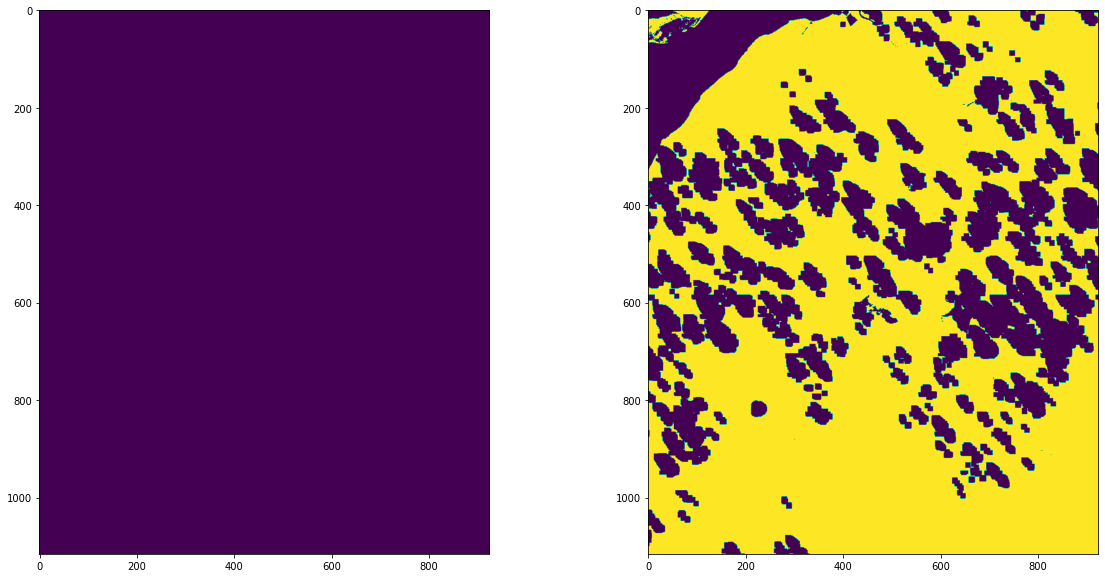

In [20]:
# plot data mask
_, axes = plt.subplots( figsize=(20,10), nrows=1, ncols=2)
axes[0].imshow( response._df[ 'data_mask.tif' ].iloc[ 3 ][ :, :, 0 ] )
axes[1].imshow( response._df[ 'data_mask.tif' ].iloc[ 3 ][ :, :, 1 ] < 2 ) 

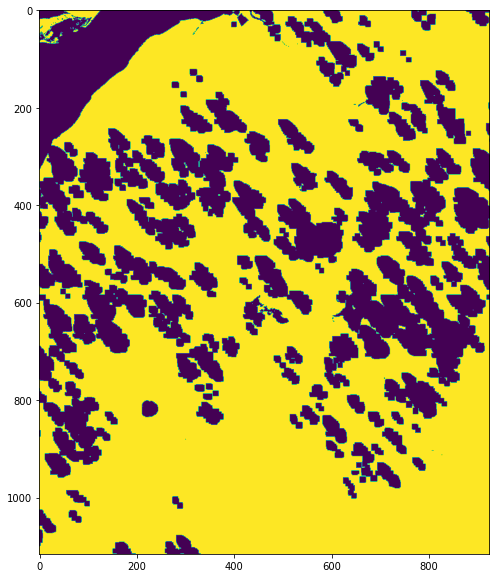

In [22]:
import matplotlib.pyplot as plt
ax = plt.figure( figsize=(10,10))

# plot combination of clear and inverted water qa bands
mask = response._df[ 'data_mask.tif' ].iloc[ 3 ][ :, :, 2 ]
plt.imshow( mask ) 